#**Univariate**

#**Getting the data**

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-01-22 11:17:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.008s  

2023-01-22 11:17:25 (21.1 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



#**Helper functions**

In [2]:
import matplotlib.pyplot as plt

def plot_series(timesteps, values, start=0, end=None, label=None, format='.', markersize=3):

  plt.plot(timesteps[start:end], values[start:end], format, label=label,  markersize=markersize)
  plt.xlabel("Time")
  plt.ylabel("Price")
  plt.grid(True)
  if label:
    plt.legend(fontsize=15)

In [3]:
import pandas as pd

data_df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv")
data_df.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [4]:
data_df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", parse_dates=["Date"], index_col=["Date"])
data_df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [6]:
data_df.describe()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
count,2787.000000,2787.000000,2787.000000,2787.000000
mean,6529.845141,6513.579485,6710.061683,6302.417386
std,10887.847444,10863.800772,11206.779756,10475.811252
min,108.584830,108.584830,118.675000,83.328330
25%,460.087500,459.400500,469.720995,450.818830
50%,2780.182500,2772.367500,2874.696250,2696.457500
75%,8506.923720,8496.887593,8763.291985,8221.060570
max,63346.789035,63562.673545,64801.787870,62094.632914


In [7]:
bitcoin_df=pd.DataFrame(data_df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_df.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


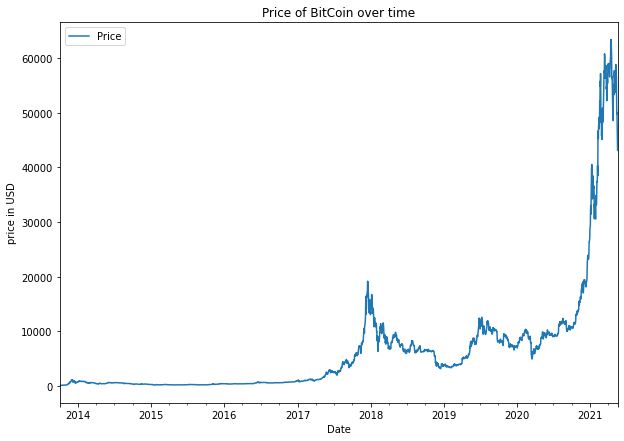

In [8]:
bitcoin_df.plot(figsize=(10,7))
plt.ylabel("price in USD")
plt.title("Price of BitCoin over time");

#**Splitting the data in the wrong way**

>Here the data is randomly splitted and there arises a risk of leakage of data from the psedo future to the past and is hence not preferable.

In [9]:
time_steps=bitcoin_df.index.to_numpy()
prices=bitcoin_df["Price"].to_numpy()

time_steps, prices

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', ...,
        '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
        '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([  123.65499   ,   125.455     ,   108.58483   , ...,
        47885.62525472, 45604.61575361, 43144.47129086]))

In [10]:
from sklearn.model_selection import train_test_split

train_price, test_price, train_time_step, test_time_step = train_test_split(prices, time_steps, test_size=0.2)

train_price.shape, test_price.shape

((2229,), (558,))

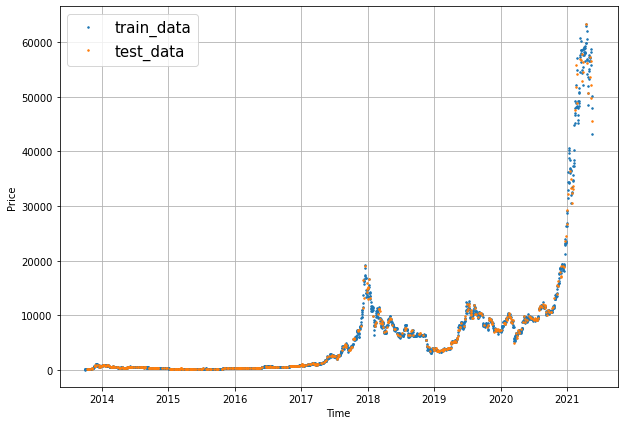

In [11]:
plt.figure(figsize=(10,7))
plot_series(train_time_step, train_price, label="train_data")
plot_series(test_time_step, test_price, label="test_data")

#**Correct way to split the data**

>Split it according to the time only.

In [12]:
split_size=int(0.8*len(prices))
split_size

2229

In [13]:
time_steps=bitcoin_df.index.to_numpy()
prices=bitcoin_df["Price"].to_numpy()

In [14]:
train_price, train_time_step=  prices[:split_size], time_steps[:split_size]
test_price, test_time_step= prices[split_size:], time_steps[split_size:]

train_price.shape, train_time_step.shape, test_price.shape, test_time_step.shape

((2229,), (2229,), (558,), (558,))

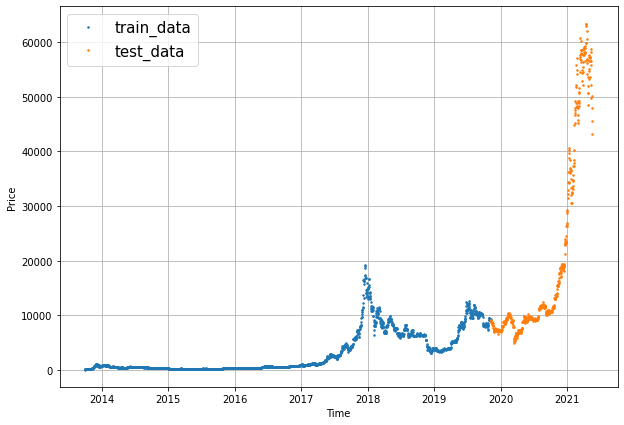

In [15]:
plt.figure(figsize=(10,7))
plot_series(train_time_step, train_price, label="train_data")
plot_series(test_time_step, test_price, label="test_data")

**Important terms**: 


*   Horizon- the time syeps in future to predict.
*   Window- the instances given to make the prediction on.

Ex: the price of bitcoin tm based on the data of 1 month: horizon=1 day, window=1 month



#**Model_0**:Naive forecast

naive forecast simply outputs the previous time step data as the future output, ie there occurs only a shit of graph by one time step.

$$\hat{y}_{t} = y_{t-1}$$ 

In [16]:
naive_forecast= test_price[:-1]
naive_forecast[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

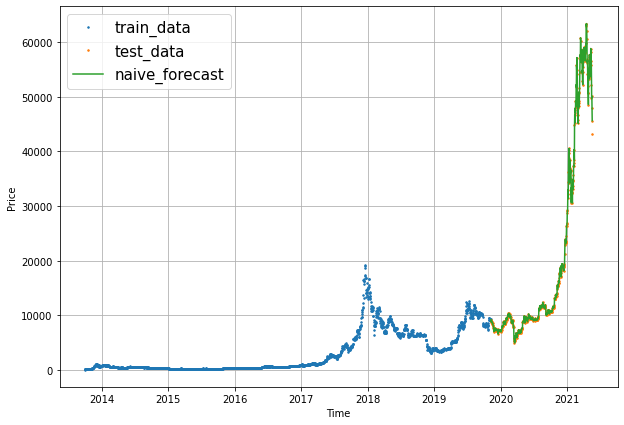

In [17]:
plt.figure(figsize=(10,7))
plot_series(train_time_step, train_price, label="train_data")
plot_series(test_time_step, test_price, label="test_data")
plot_series(test_time_step[1:], naive_forecast, label="naive_forecast", format='-')

#**Metrics for regression**:
* MAE
* MSE
* RMSE
* MASE (if <1 then model performs better than naive model if>1 then model performs poorer than naive model)
* MAPE
* sMAPE

In [18]:
import tensorflow as tf

def calculate_mase(y_true, y_preds):
  mae=tf.reduce_mean(tf.abs(y_true-y_preds))
  mae_naive_no_seasonality=tf.reduce_mean(tf.abs(y_true[1:]- y_true[:-1]))
  mase=mae/mae_naive_no_seasonality

  return mase

In [19]:
calculate_mase(test_price[1:], naive_forecast)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9995699939182624>

In [20]:
def calculate_metrics(y_true, y_preds):

  y_true=tf.cast(y_true, dtype=tf.float32)
  y_preds=tf.cast(y_preds, dtype=tf.float32)
  
  mae=tf.keras.metrics.mean_absolute_error(y_true, y_preds)
  mse=tf.keras.metrics.mean_squared_error(y_true, y_preds)
  rmse=tf.sqrt(mse)
  mase=calculate_mase(y_true, y_preds)
  mape=tf.keras.metrics.mean_absolute_percentage_error(y_true, y_preds)

  if mae.ndim>0:
    rmse=tf.reduce_mean(rmse)
    mae=tf.reduce_mean(mae)
    mse=tf.reduce_mean(mse)
    mase=tf.reduce_mean(mase)
    mape=tf.reduce_mean(mape)

  return {"mae":mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()}

In [21]:
model_0_results=calculate_metrics(test_price[1:], naive_forecast)
model_0_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

#**Pre_processing**: so that the data can be used for supervised learning. 

In [22]:
WINDOW_SIZE=7
HORIZON=1

**Transform windows into labels+windows**

In [23]:
def label_windows(x,horizon=HORIZON):

  return x[:,:-horizon], x[:,-horizon:]

In [24]:
import numpy as np

window, horizon=label_windows(np.expand_dims(np.arange(8), axis=0))
window, horizon

(array([[0, 1, 2, 3, 4, 5, 6]]), array([[7]]))

**Transform the data into windows**

In [25]:
def make_windows(x, horizon=HORIZON, window=WINDOW_SIZE):
  
  window_step=np.expand_dims(np.arange(horizon+window), axis=0)

  #create a 2d array for window_index(broadcasting is being employed)
  window_index= window_step+np.expand_dims(np.arange(len(x)-(window+horizon-1)), axis=0).T

  #get the corresponding values for the index from the x matrix
  window_array= x[window_index]

  #split the data to window and horizon
  window, horizon=label_windows(window_array, horizon)

  return window, horizon

In [26]:
full_window, full_horizon= make_windows(prices)
for i in range(5):
  print(f"window:{full_window[i]} -> horizon:{full_horizon[i]}")

window:[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> horizon:[123.033]
window:[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> horizon:[124.049]
window:[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> horizon:[125.96116]
window:[118.67466 121.33866 120.65533 121.795   123.033   124.049   125.96116] -> horizon:[125.27966]
window:[121.33866 120.65533 121.795   123.033   124.049   125.96116 125.27966] -> horizon:[125.9275]


**Splitting the data to train and test**

In [27]:
def train_test_split(X, y, test_size=0.2):
  train_size=int(len(X)*(1-test_size))
  train_data=X[:train_size]
  test_data=X[train_size:]
  train_labels=y[:train_size]
  test_labels=y[train_size:]
  return train_data, test_data, train_labels, test_labels

In [28]:
train_windows, test_windows, train_horizons, test_horizons= train_test_split(full_window, full_horizon)
len(train_windows), len(test_windows)

(2224, 556)

#**Callbacks**

In [29]:
import os
#modelcheckpoint callback

def checkpoint_callback(model_name, file_path="model_experiments"):
 return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(file_path, model_name),
                                           save_best_only=True)

#**Model_1**:simple dense layer

In [30]:
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(128, activation="relu"),
                             tf.keras.layers.Dense(HORIZON, activation="linear")])

In [31]:
model_1.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

history_1=model_1.fit(train_windows, train_horizons,
                      epochs=100,       
                      callbacks=[checkpoint_callback("model_1")],
                      validation_data=(test_windows, test_horizons),
                      batch_size=128) #since the data points are themselves very small

Epoch 1/100
18/18 [==============================] - 4s 40ms/step - loss: 653.8341 - mae: 653.8341 - val_loss: 1927.4271 - val_mae: 1927.4271
Epoch 2/100
18/18 [==============================] - 1s 35ms/step - loss: 224.2980 - mae: 224.2980 - val_loss: 1046.1821 - val_mae: 1046.1821
Epoch 3/100
18/18 [==============================] - 0s 25ms/step - loss: 179.3385 - mae: 179.3385 - val_loss: 935.7234 - val_mae: 935.7234
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 167.7989 - mae: 167.7989 - val_loss: 941.7652 - val_mae: 941.7652
Epoch 5/100
18/18 [==============================] - 0s 24ms/step - loss: 163.9258 - mae: 163.9258 - val_loss: 901.7481 - val_mae: 901.7481
Epoch 6/100
18/18 [==============================] - 0s 26ms/step - loss: 156.3256 - mae: 156.3256 - val_loss: 859.6893 - val_mae: 859.6893
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 150.9441 - mae: 150.9441 - val_loss: 879.9421 - val_mae: 879.9421
Epoch 8/100
18/18 

In [32]:
model_1.evaluate(test_windows, test_horizons)

18/18 [==============================] - 0s 2ms/step - loss: 587.7787 - mae: 587.7787


[587.7786865234375, 587.7786865234375]

In [33]:
model_1=tf.keras.models.load_model("/content/model_experiments/model_1")
model_1.evaluate(test_windows, test_horizons)

18/18 [==============================] - 0s 2ms/step - loss: 565.5070 - mae: 565.5070


[565.5070190429688, 565.5070190429688]

In [34]:
y_preds=model_1.predict(test_windows)
y_preds.shape

18/18 [==============================] - 0s 1ms/step


(556, 1)

In [35]:
test_horizons.shape

(556, 1)

In [36]:
model_1_results=calculate_metrics(tf.squeeze(test_horizons),tf.squeeze(y_preds))
model_1_results

{'mae': 565.50696,
 'mse': 1159044.9,
 'rmse': 1076.5895,
 'mape': 2.5292044,
 'mase': 0.9934391}

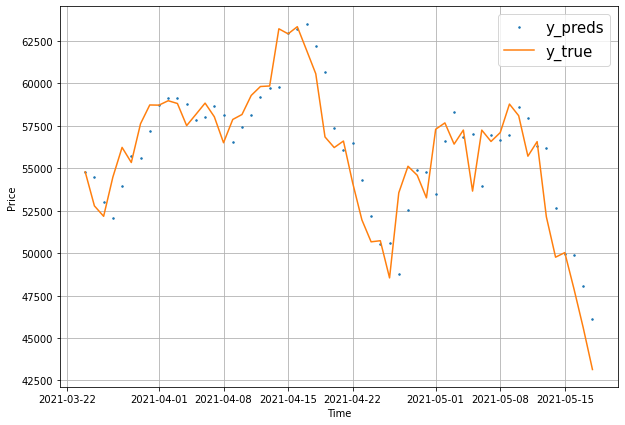

In [37]:
plt.figure(figsize=(10,7))
offset=500
plot_series(time_steps[-len(test_horizons):], tf.squeeze(y_preds), label="y_preds", start=offset)
plot_series(time_steps[-len(test_horizons):], tf.squeeze(test_horizons), label="y_true", format="-", start=offset )

#**Model_2**: same as model_1 but with window size=30, horizon =1

In [38]:
full_windows_30, full_horizons=make_windows(prices, horizon=HORIZON, window=30)

In [39]:
train_windows_30, test_windows_30, train_horizons_1, test_horizons_1= train_test_split(full_windows_30, full_horizons)
train_windows_30.shape, test_windows_30.shape, train_horizons_1.shape, test_horizons_1.shape

((2205, 30), (552, 30), (2205, 1), (552, 1))

In [40]:
model_2= tf.keras.Sequential([tf.keras.layers.Dense(128, activation="relu"),
                             tf.keras.layers.Dense(HORIZON, activation="linear")])

In [41]:
model_2.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

history_2=model_2.fit(train_windows_30, train_horizons_1,
                      epochs=100,
                      validation_data=(test_windows_30, test_horizons_1),
                      callbacks=[checkpoint_callback("model_2")])

Epoch 1/100
69/69 [==============================] - 1s 10ms/step - loss: 336.0731 - mae: 336.0731 - val_loss: 1626.5317 - val_mae: 1626.5317
Epoch 2/100
69/69 [==============================] - 1s 9ms/step - loss: 223.0999 - mae: 223.0999 - val_loss: 1040.4714 - val_mae: 1040.4714
Epoch 3/100
69/69 [==============================] - 0s 4ms/step - loss: 200.6319 - mae: 200.6319 - val_loss: 1443.1272 - val_mae: 1443.1272
Epoch 4/100
69/69 [==============================] - 1s 9ms/step - loss: 192.6195 - mae: 192.6195 - val_loss: 912.6610 - val_mae: 912.6610
Epoch 5/100
69/69 [==============================] - 0s 3ms/step - loss: 179.1302 - mae: 179.1302 - val_loss: 1276.6406 - val_mae: 1276.6406
Epoch 6/100
69/69 [==============================] - 1s 9ms/step - loss: 189.9264 - mae: 189.9264 - val_loss: 833.9031 - val_mae: 833.9031
Epoch 7/100
69/69 [==============================] - 0s 3ms/step - loss: 235.9833 - mae: 235.9833 - val_loss: 1151.1761 - val_mae: 1151.1761
Epoch 8/100
69/6

In [42]:
model_2=tf.keras.models.load_model("/content/model_experiments/model_2")
model_2.evaluate(test_windows_30, test_horizons_1)

18/18 [==============================] - 0s 2ms/step - loss: 587.2360 - mae: 587.2360


[587.2360229492188, 587.2360229492188]

In [43]:
y_preds=model_2.predict(test_windows_30)
y_preds.shape

18/18 [==============================] - 0s 1ms/step


(552, 1)

In [44]:
model_2_results=calculate_metrics(test_horizons_1.squeeze(), y_preds.squeeze())
model_2_results

{'mae': 587.236,
 'mse': 1216679.0,
 'rmse': 1103.0317,
 'mape': 2.6429322,
 'mase': 1.0264944}

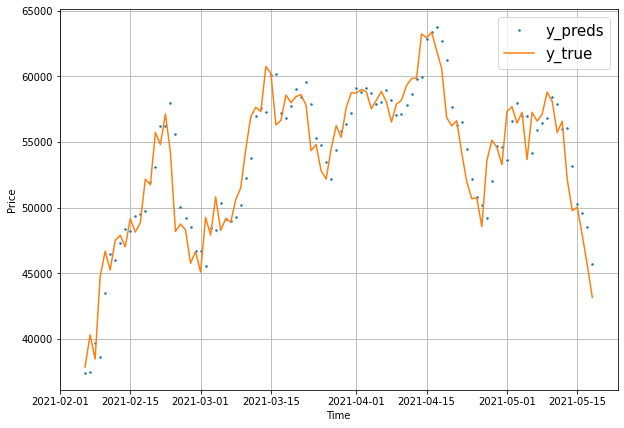

In [45]:
plt.figure(figsize=(10,7))
plot_series(time_steps[-len(test_horizons_1):], y_preds.squeeze(), start=450, label="y_preds")
plot_series(time_steps[-len(test_horizons_1):], test_horizons_1.squeeze(), label="y_true", format="-", start=450)

#**Model_3**: same as model_1 but with window size=30, horizon=7

In [46]:
full_windows_30, full_horizons_7=make_windows(prices, window=30, horizon=7)
full_windows_30.shape, full_horizons_7.shape

((2751, 30), (2751, 7))

In [47]:
train_windows_30, test_windows_30, train_horizons_7, test_horizons_7=train_test_split(full_windows_30, full_horizons_7)
train_windows_30.shape, test_windows_30.shape, train_horizons_7.shape, test_horizons_7.shape

((2200, 30), (551, 30), (2200, 7), (551, 7))

In [48]:
model_3= tf.keras.Sequential([tf.keras.layers.Dense(128, activation="relu"),
                             tf.keras.layers.Dense(7)])

In [49]:
model_3.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

history_3=model_3.fit(train_windows_30, train_horizons_7,
                      epochs=100,
                      validation_data=(test_windows_30, test_horizons_7),
                      callbacks=[checkpoint_callback("model_3")])

Epoch 1/100
69/69 [==============================] - 1s 10ms/step - loss: 617.4762 - mae: 617.4762 - val_loss: 1816.7466 - val_mae: 1816.7466
Epoch 2/100
69/69 [==============================] - 1s 9ms/step - loss: 341.3235 - mae: 341.3235 - val_loss: 1579.9800 - val_mae: 1579.9800
Epoch 3/100
69/69 [==============================] - 1s 9ms/step - loss: 302.6752 - mae: 302.6752 - val_loss: 1516.2106 - val_mae: 1516.2106
Epoch 4/100
69/69 [==============================] - 0s 3ms/step - loss: 290.0000 - mae: 290.0000 - val_loss: 1535.2629 - val_mae: 1535.2629
Epoch 5/100
69/69 [==============================] - 1s 9ms/step - loss: 279.5555 - mae: 279.5555 - val_loss: 1507.1501 - val_mae: 1507.1501
Epoch 6/100
69/69 [==============================] - 1s 9ms/step - loss: 281.9036 - mae: 281.9036 - val_loss: 1486.1161 - val_mae: 1486.1161
Epoch 7/100
69/69 [==============================] - 1s 8ms/step - loss: 266.9669 - mae: 266.9669 - val_loss: 1451.7349 - val_mae: 1451.7349
Epoch 8/100


In [50]:
model_3=tf.keras.models.load_model("/content/model_experiments/model_3")
model_3.evaluate(test_windows_30, test_horizons_7)

18/18 [==============================] - 0s 2ms/step - loss: 1210.5121 - mae: 1210.5121


[1210.5120849609375, 1210.5120849609375]

In [51]:
y_preds=model_3.predict(test_windows_30)
y_preds.shape

18/18 [==============================] - 0s 1ms/step


(551, 7)

In [52]:
model_3_results=calculate_metrics(tf.squeeze(test_horizons_7),tf.squeeze(y_preds))
model_3_results

{'mae': 1210.5122,
 'mse': 5096469.0,
 'rmse': 1389.6879,
 'mape': 5.5368156,
 'mase': 2.154039}

**Exact plot**

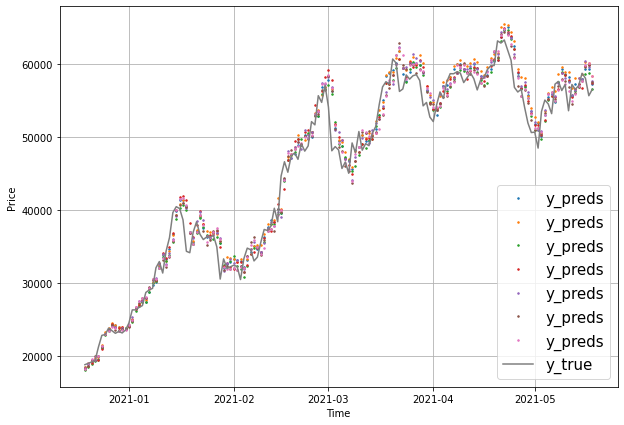

In [53]:
plt.figure(figsize=(10,7))
plot_series(time_steps[-len(test_horizons_7):], y_preds, label="y_preds", start=400)
plot_series(time_steps[-len(test_horizons_7):], test_horizons_7[:,0], label="y_true", format="-", start=400)

**Reduced mean plot**

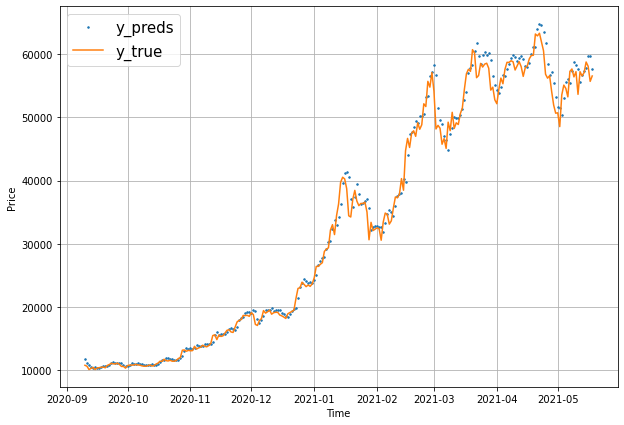

In [54]:
plt.figure(figsize=(10,7))
plot_series(time_steps[-len(test_horizons_7):], tf.reduce_mean(y_preds, axis=1), label="y_preds", start=300)
plot_series(time_steps[-len(test_horizons_7):], test_horizons_7[:,0], label="y_true", format="-", start=300)

In [55]:
model_1_type_df=pd.DataFrame({"model_0":model_0_results,
                              "model_1":model_1_results,
                              "model_2":model_2_results,
                              "model_3":model_3_results}).T #T is for transpose

model_1_type_df

,mae,mse,rmse,mape,mase
model_0,567.980225,1147547.000,1071.236206,2.516525,0.999570
model_1,565.506958,1159044.875,1076.589478,2.529204,0.993439
model_2,587.236023,1216679.000,1103.031738,2.642932,1.026494
model_3,1210.512207,5096469.000,1389.687866,5.536816,2.154039


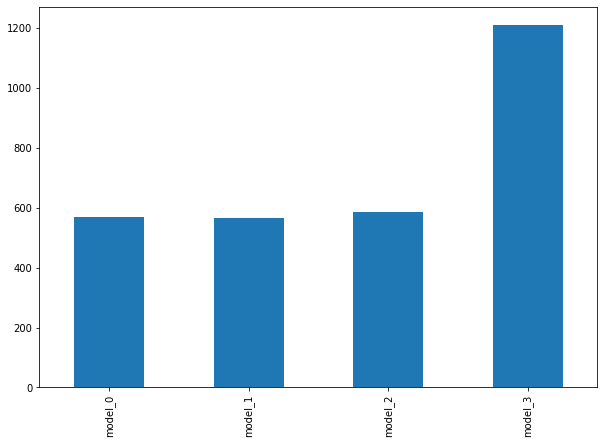

In [56]:
model_1_type_df["mae"].plot(kind="bar", figsize=(10,7));

#**Model_4**:conv 1D

>Conv_1D takes in an input of dim=3 (batch_size, time_steps, input_dim)

* timesteps is the same as features or window_size in our case
* input_dim is the horizon size

so train_data must be of form (, 7, 1)

In [57]:
full_window, full_horizon= make_windows(prices)
train_windows, test_windows, train_horizons, test_horizons= train_test_split(full_window, full_horizon)

In [58]:
expand_dims_layer=tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
print(f"train_window:{train_windows[0]}\ntrain_window_shape{train_windows[0].shape}\nupdated_window{expand_dims_layer(train_windows[0])}")

train_window:[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ]
train_window_shape(7,)
updated_window[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [59]:
model_4=tf.keras.Sequential([tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
                             tf.keras.layers.Conv1D(128, 3, padding="causal", activation="relu"),
                             tf.keras.layers.Dense(1)])

In [60]:
model_4.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

history_4=model_4.fit(train_windows, train_horizons,
            epochs=100,
            batch_size=128,
            validation_data=(test_windows, test_horizons),
            callbacks=checkpoint_callback("model_4"))

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 1538.1166 - mae: 1538.1166  

18/18 [==============================] - 7s 57ms/step - loss: 1508.6549 - mae: 1508.6549 - val_loss: 1312.8966 - val_mae: 1312.8966
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 331.3085 - mae: 331.3085 - val_loss: 1681.7133 - val_mae: 1681.7133
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 258.4448 - mae: 258.4448

18/18 [==============================] - 1s 36ms/step - loss: 208.3742 - mae: 208.3742 - val_loss: 1011.5785 - val_mae: 1011.5785
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 156.7918 - mae: 156.7918

18/18 [==============================] - 1s 37ms/step - loss: 185.0858 - mae: 185.0858 - val_loss: 1002.8325 - val_mae: 1002.8325
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 185.2212 - mae: 185.2212 - val_loss: 1036.7484 - val_mae: 1036.7484
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 177.8883 - mae: 177.8883 - val_loss: 1049.1362 - val_mae: 1049.1362
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 160.2622 - mae: 160.2622

18/18 [==============================] - 1s 38ms/step - loss: 170.9370 - mae: 170.9370 - val_loss: 951.2578 - val_mae: 951.2578
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 167.0629 - mae: 167.0629

18/18 [==============================] - 1s 51ms/step - loss: 167.0629 - mae: 167.0629 - val_loss: 925.1879 - val_mae: 925.1879
Epoch 9/100
18/18 [==============================] - ETA: 0s - loss: 166.4687 - mae: 166.4687

18/18 [==============================] - 1s 38ms/step - loss: 166.4687 - mae: 166.4687 - val_loss: 914.5417 - val_mae: 914.5417
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 176.6875 - mae: 176.6875

18/18 [==============================] - 1s 38ms/step - loss: 160.8046 - mae: 160.8046 - val_loss: 891.4777 - val_mae: 891.4777
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 158.1455 - mae: 158.1455 - val_loss: 898.2968 - val_mae: 898.2968
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 136.1446 - mae: 136.1446

18/18 [==============================] - 1s 39ms/step - loss: 153.8665 - mae: 153.8665 - val_loss: 852.5131 - val_mae: 852.5131
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 155.5221 - mae: 155.5221 - val_loss: 858.7638 - val_mae: 858.7637
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 148.0809 - mae: 148.0809

18/18 [==============================] - 1s 36ms/step - loss: 148.0809 - mae: 148.0809 - val_loss: 816.9520 - val_mae: 816.9520
Epoch 15/100
16/18 [=========================>....] - ETA: 0s - loss: 148.1793 - mae: 148.1793

18/18 [==============================] - 1s 38ms/step - loss: 147.3632 - mae: 147.3632 - val_loss: 811.8005 - val_mae: 811.8005
Epoch 16/100
16/18 [=========================>....] - ETA: 0s - loss: 142.7488 - mae: 142.7488

18/18 [==============================] - 1s 37ms/step - loss: 144.1650 - mae: 144.1650 - val_loss: 803.8035 - val_mae: 803.8035
Epoch 17/100
18/18 [==============================] - 0s 4ms/step - loss: 144.5337 - mae: 144.5337 - val_loss: 872.9990 - val_mae: 872.9990
Epoch 18/100
16/18 [=========================>....] - ETA: 0s - loss: 142.9752 - mae: 142.9752

18/18 [==============================] - 1s 37ms/step - loss: 144.0373 - mae: 144.0373 - val_loss: 790.8825 - val_mae: 790.8825
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 139.2167 - mae: 139.2167 - val_loss: 863.1807 - val_mae: 863.1807
Epoch 20/100
14/18 [======================>.......] - ETA: 0s - loss: 136.4504 - mae: 136.4504

18/18 [==============================] - 1s 38ms/step - loss: 137.4238 - mae: 137.4238 - val_loss: 766.9379 - val_mae: 766.9380
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 134.7964 - mae: 134.7964

18/18 [==============================] - 1s 37ms/step - loss: 135.6787 - mae: 135.6787 - val_loss: 760.2516 - val_mae: 760.2516
Epoch 22/100
16/18 [=========================>....] - ETA: 0s - loss: 133.6963 - mae: 133.6963

18/18 [==============================] - 1s 38ms/step - loss: 133.5672 - mae: 133.5672 - val_loss: 743.2736 - val_mae: 743.2736
Epoch 23/100
15/18 [========================>.....] - ETA: 0s - loss: 128.6046 - mae: 128.6046

18/18 [==============================] - 1s 38ms/step - loss: 127.9171 - mae: 127.9171 - val_loss: 718.7350 - val_mae: 718.7350
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 131.9119 - mae: 131.9119 - val_loss: 829.8212 - val_mae: 829.8212
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 130.4925 - mae: 130.4925 - val_loss: 771.3708 - val_mae: 771.3708
Epoch 26/100
18/18 [==============================] - ETA: 0s - loss: 127.0282 - mae: 127.0282

18/18 [==============================] - 1s 52ms/step - loss: 127.0282 - mae: 127.0282 - val_loss: 678.9615 - val_mae: 678.9615
Epoch 27/100
18/18 [==============================] - ETA: 0s - loss: 121.9524 - mae: 121.9524

18/18 [==============================] - 1s 38ms/step - loss: 121.9524 - mae: 121.9524 - val_loss: 676.5349 - val_mae: 676.5349
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 124.5128 - mae: 124.5128

18/18 [==============================] - 1s 38ms/step - loss: 121.2717 - mae: 121.2717 - val_loss: 663.2291 - val_mae: 663.2291
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 120.7796 - mae: 120.7796 - val_loss: 700.5629 - val_mae: 700.5629
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 124.7721 - mae: 124.7721 - val_loss: 715.0654 - val_mae: 715.0654
Epoch 31/100
17/18 [===========================>..] - ETA: 0s - loss: 121.5118 - mae: 121.5118

18/18 [==============================] - 1s 37ms/step - loss: 120.3586 - mae: 120.3586 - val_loss: 646.7271 - val_mae: 646.7271
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 117.9093 - mae: 117.9093 - val_loss: 652.0891 - val_mae: 652.0891
Epoch 33/100
18/18 [==============================] - ETA: 0s - loss: 117.2544 - mae: 117.2544

18/18 [==============================] - 1s 37ms/step - loss: 117.2544 - mae: 117.2544 - val_loss: 634.6348 - val_mae: 634.6348
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 117.2483 - mae: 117.2483 - val_loss: 657.0736 - val_mae: 657.0736
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 117.7761 - mae: 117.7761 - val_loss: 646.8423 - val_mae: 646.8423
Epoch 36/100
18/18 [==============================] - ETA: 0s - loss: 120.1081 - mae: 120.1081

18/18 [==============================] - 1s 38ms/step - loss: 120.1081 - mae: 120.1081 - val_loss: 626.2399 - val_mae: 626.2399
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 124.2323 - mae: 124.2323

18/18 [==============================] - 1s 38ms/step - loss: 124.2323 - mae: 124.2323 - val_loss: 621.1483 - val_mae: 621.1483
Epoch 38/100
18/18 [==============================] - ETA: 0s - loss: 116.7034 - mae: 116.7034

18/18 [==============================] - 1s 36ms/step - loss: 116.7034 - mae: 116.7034 - val_loss: 619.5207 - val_mae: 619.5207
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 117.0878 - mae: 117.0878 - val_loss: 623.0953 - val_mae: 623.0953
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 104.9648 - mae: 104.9648

18/18 [==============================] - 1s 36ms/step - loss: 114.0975 - mae: 114.0975 - val_loss: 611.4551 - val_mae: 611.4551
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 112.0660 - mae: 112.0660 - val_loss: 612.6633 - val_mae: 612.6633
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 133.0946 - mae: 133.0946

18/18 [==============================] - 1s 38ms/step - loss: 115.8922 - mae: 115.8922 - val_loss: 606.8259 - val_mae: 606.8259
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 113.2756 - mae: 113.2756 - val_loss: 631.6292 - val_mae: 631.6292
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 117.3120 - mae: 117.3120

18/18 [==============================] - 1s 36ms/step - loss: 118.8392 - mae: 118.8392 - val_loss: 602.8500 - val_mae: 602.8500
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 114.4831 - mae: 114.4831 - val_loss: 613.8832 - val_mae: 613.8832
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 114.3436 - mae: 114.3436 - val_loss: 625.7735 - val_mae: 625.7735
Epoch 47/100
15/18 [========================>.....] - ETA: 0s - loss: 111.5807 - mae: 111.5807

18/18 [==============================] - 1s 52ms/step - loss: 114.9033 - mae: 114.9033 - val_loss: 596.3685 - val_mae: 596.3685
Epoch 48/100
16/18 [=========================>....] - ETA: 0s - loss: 111.0435 - mae: 111.0435

18/18 [==============================] - 1s 39ms/step - loss: 111.1747 - mae: 111.1747 - val_loss: 594.6807 - val_mae: 594.6807
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4786 - mae: 111.4786 - val_loss: 627.7303 - val_mae: 627.7303
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 118.2371 - mae: 118.2371 - val_loss: 637.7961 - val_mae: 637.7961
Epoch 51/100
18/18 [==============================] - ETA: 0s - loss: 111.8575 - mae: 111.8575

18/18 [==============================] - 1s 37ms/step - loss: 111.8575 - mae: 111.8575 - val_loss: 592.7758 - val_mae: 592.7758
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 110.2439 - mae: 110.2439 - val_loss: 594.6804 - val_mae: 594.6804
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 114.4380 - mae: 114.4380 - val_loss: 652.3159 - val_mae: 652.3159
Epoch 54/100
18/18 [==============================] - ETA: 0s - loss: 113.0223 - mae: 113.0223

18/18 [==============================] - 1s 38ms/step - loss: 113.0223 - mae: 113.0223 - val_loss: 590.5762 - val_mae: 590.5762
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 114.3829 - mae: 114.3829 - val_loss: 666.8779 - val_mae: 666.8779
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 119.5275 - mae: 119.5275 - val_loss: 773.4642 - val_mae: 773.4642
Epoch 57/100
 1/18 [>.............................] - ETA: 0s - loss: 137.9252 - mae: 137.9252

18/18 [==============================] - 1s 37ms/step - loss: 113.1818 - mae: 113.1818 - val_loss: 586.4579 - val_mae: 586.4579
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4791 - mae: 110.4791 - val_loss: 602.6145 - val_mae: 602.6145
Epoch 59/100
18/18 [==============================] - 0s 4ms/step - loss: 113.8108 - mae: 113.8108 - val_loss: 592.9936 - val_mae: 592.9936
Epoch 60/100
 1/18 [>.............................] - ETA: 0s - loss: 110.1120 - mae: 110.1120

18/18 [==============================] - 1s 37ms/step - loss: 111.1954 - mae: 111.1954 - val_loss: 582.8060 - val_mae: 582.8060
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 109.9849 - mae: 109.9849 - val_loss: 592.4384 - val_mae: 592.4384
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4615 - mae: 109.4615 - val_loss: 592.6856 - val_mae: 592.6856
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4227 - mae: 113.4227 - val_loss: 583.3125 - val_mae: 583.3125
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4588 - mae: 113.4588 - val_loss: 648.4890 - val_mae: 648.4890
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 116.5910 - mae: 116.5910 - val_loss: 603.0038 - val_mae: 603.0038
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1911 - mae: 113.1911 - val_loss: 594.7829 - val_mae: 594.7829
Epoch 67/100
18/18 [============

18/18 [==============================] - 1s 38ms/step - loss: 110.8803 - mae: 110.8803 - val_loss: 580.8837 - val_mae: 580.8837
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1665 - mae: 111.1665 - val_loss: 645.4385 - val_mae: 645.4385
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1278 - mae: 111.1278 - val_loss: 588.2809 - val_mae: 588.2809
Epoch 75/100
18/18 [==============================] - ETA: 0s - loss: 110.6885 - mae: 110.6885

18/18 [==============================] - 1s 37ms/step - loss: 110.6885 - mae: 110.6885 - val_loss: 578.1522 - val_mae: 578.1522
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 86.8870 - mae: 86.8870

18/18 [==============================] - 1s 36ms/step - loss: 107.7594 - mae: 107.7594 - val_loss: 576.9435 - val_mae: 576.9435
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 108.9466 - mae: 108.9466 - val_loss: 651.8441 - val_mae: 651.8441
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5845 - mae: 109.5845 - val_loss: 608.9554 - val_mae: 608.9554
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2878 - mae: 108.2878 - val_loss: 587.0164 - val_mae: 587.0164
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 112.1842 - mae: 112.1842 - val_loss: 626.8076 - val_mae: 626.8076
Epoch 81/100
18/18 [==============================] - 0s 4ms/step - loss: 109.2268 - mae: 109.2268 - val_loss: 693.5856 - val_mae: 693.5856
Epoch 82/100
18/18 [==============================] - 0s 4ms/step - loss: 111.8490 - mae: 111.8490 - val_loss: 579.3116 - val_mae: 579.3116
Epoch 83/100
18/18 [============

18/18 [==============================] - 1s 36ms/step - loss: 108.8299 - mae: 108.8299 - val_loss: 573.6953 - val_mae: 573.6953
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 109.9659 - mae: 109.9659 - val_loss: 585.2607 - val_mae: 585.2607
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3687 - mae: 113.3687 - val_loss: 623.8047 - val_mae: 623.8047
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 112.6436 - mae: 112.6436 - val_loss: 578.8719 - val_mae: 578.8719
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 108.4641 - mae: 108.4641 - val_loss: 600.0004 - val_mae: 600.0004
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 108.4877 - mae: 108.4877 - val_loss: 578.0488 - val_mae: 578.0488
Epoch 91/100
18/18 [==============================] - 0s 4ms/step - loss: 107.6123 - mae: 107.6123 - val_loss: 609.4461 - val_mae: 609.4461
Epoch 92/100
18/18 [============

18/18 [==============================] - 1s 37ms/step - loss: 107.1661 - mae: 107.1661 - val_loss: 572.2241 - val_mae: 572.2241
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 108.1046 - mae: 108.1046 - val_loss: 574.3052 - val_mae: 574.3052
Epoch 98/100
18/18 [==============================] - ETA: 0s - loss: 107.7314 - mae: 107.7314

18/18 [==============================] - 1s 52ms/step - loss: 107.7314 - mae: 107.7314 - val_loss: 570.4709 - val_mae: 570.4709
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 108.3238 - mae: 108.3238 - val_loss: 574.5641 - val_mae: 574.5641
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 106.3181 - mae: 106.3181 - val_loss: 599.0903 - val_mae: 599.0903


In [61]:
model_4=tf.keras.models.load_model("/content/model_experiments/model_4")
model_4.evaluate(test_windows, test_horizons)

18/18 [==============================] - 0s 4ms/step - loss: 570.4708 - mae: 570.4708


[570.4708251953125, 570.4708251953125]

In [62]:
y_preds=model_4.predict(test_windows)
y_preds.shape, y_preds.squeeze().shape

18/18 [==============================] - 0s 2ms/step


((556, 1, 1), (556,))

In [63]:
model_4_results=calculate_metrics(test_horizons.squeeze(), y_preds.squeeze())
model_4_results

{'mae': 570.4708,
 'mse': 1178377.2,
 'rmse': 1085.5309,
 'mape': 2.5413198,
 'mase': 1.0021592}

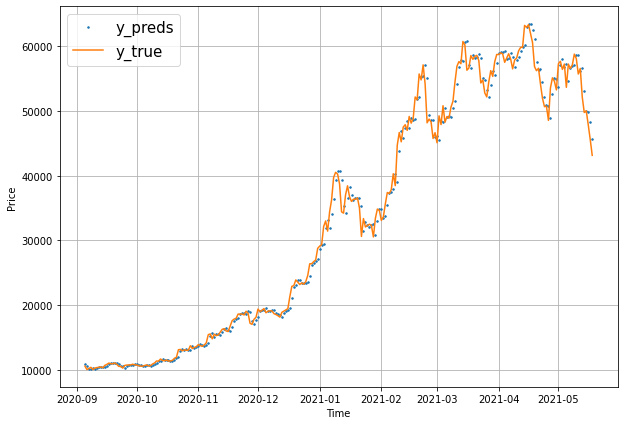

In [64]:
plt.figure(figsize=(10,7))
plot_series(time_steps[-len(test_horizons):], y_preds.squeeze(), label="y_preds", start=300)
plot_series(time_steps[-len(test_horizons):], test_horizons.squeeze(), label="y_true", format="-", start=300)

#**Model_5**: LSTM

In [65]:
model_5=tf.keras.Sequential([tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
                             tf.keras.layers.LSTM(128,activation="relu"),
                             tf.keras.layers.Dense(1)])

In [66]:
model_5.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

history_5=model_5.fit(train_windows, train_horizons,
                      epochs=100,
                      batch_size=128,
                      validation_data=(test_windows, test_horizons),
                      callbacks=[checkpoint_callback("model_5")])

Epoch 1/100
18/18 [==============================] - 3s 116ms/step - loss: 2127.7734 - mae: 2127.7734 - val_loss: 7489.0640 - val_mae: 7489.0640
Epoch 2/100
18/18 [==============================] - 2s 100ms/step - loss: 492.4039 - mae: 492.4039 - val_loss: 1838.1913 - val_mae: 1838.1913
Epoch 3/100
18/18 [==============================] - 2s 119ms/step - loss: 227.2407 - mae: 227.2407 - val_loss: 1237.8126 - val_mae: 1237.8126
Epoch 4/100
18/18 [==============================] - 2s 105ms/step - loss: 187.5653 - mae: 187.5653 - val_loss: 1086.2653 - val_mae: 1086.2653
Epoch 5/100
18/18 [==============================] - 2s 107ms/step - loss: 177.7382 - mae: 177.7382 - val_loss: 1028.1292 - val_mae: 1028.1292
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 175.9470 - mae: 175.9470 - val_loss: 1040.9573 - val_mae: 1040.9573
Epoch 7/100
18/18 [==============================] - 2s 100ms/step - loss: 176.7070 - mae: 176.7070 - val_loss: 1019.6288 - val_mae: 1019.6288

In [67]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 1, 7)              0         
                                                                 
 lstm (LSTM)                 (None, 128)               69632     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________


In [68]:
model_5=tf.keras.models.load_model("/content/model_experiments/model_5")
model_5.evaluate(test_windows, test_horizons)

18/18 [==============================] - 0s 3ms/step - loss: 584.0263 - mae: 584.0263


[584.0263061523438, 584.0263061523438]

In [69]:
y_preds=model_5.predict(test_windows)
y_preds.shape, y_preds.squeeze().shape

18/18 [==============================] - 0s 2ms/step


((556, 1), (556,))

In [70]:
model_5_results=calculate_metrics(test_horizons.squeeze(), y_preds.squeeze())
model_5_results

{'mae': 584.0263,
 'mse': 1229932.4,
 'rmse': 1109.0231,
 'mape': 2.6217003,
 'mase': 1.0259725}

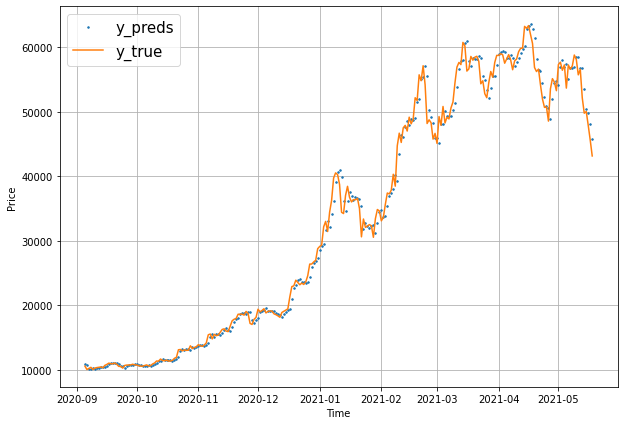

In [71]:
plt.figure(figsize=(10,7))
plot_series(time_steps[-len(test_horizons):], y_preds.squeeze(), label="y_preds", start=300)
plot_series(time_steps[-len(test_horizons):], test_horizons.squeeze(), label="y_true", format="-", start=300)

#**Multi-variate**

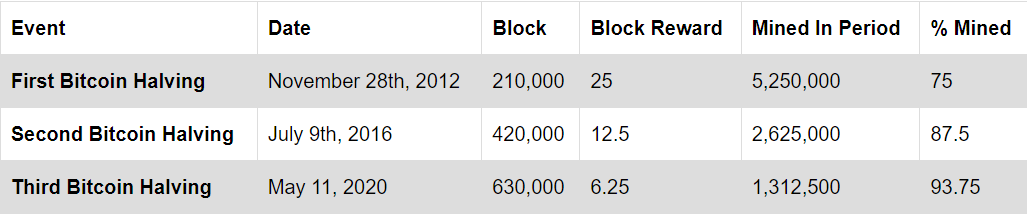

In [72]:
#The extra feature that we shall add will be the bitcoin halving events since the price rises abruptly after every halving event.
#since the system is open we can litrally take many things as a feature like the tweets of elon musk etc.

block_reward_1=25 #28th nov 2012
block_reward_2=12.5 #9th jul 2016
block_reward_3=6.25 #11th may 2020

block_reward_1_date=np.datetime64("2013-11-28T00:00:00.000000000")
block_reward_2_date=np.datetime64("2016-07-09T00:00:00.000000000")
block_reward_3_date=np.datetime64("2020-05-11T00:00:00.000000000")
block_reward_1_date, block_reward_2_date, block_reward_3_date

(numpy.datetime64('2013-11-28T00:00:00.000000000'),
 numpy.datetime64('2016-07-09T00:00:00.000000000'),
 numpy.datetime64('2020-05-11T00:00:00.000000000'))

In [73]:
time_steps[0], time_steps[-1]

(numpy.datetime64('2013-10-01T00:00:00.000000000'),
 numpy.datetime64('2021-05-18T00:00:00.000000000'))

In [74]:
block_reward_1_days=(block_reward_2_date-bitcoin_df.index[0]).days
block_reward_2_days=(block_reward_3_date-bitcoin_df.index[0]).days
block_reward_1_days, block_reward_2_days

(1012, 2414)

In [75]:
bitcoin_df["block_reward"]=None
bitcoin_df.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [76]:
bitcoin_df.iloc[:block_reward_1_days,-1]=block_reward_1
bitcoin_df.iloc[block_reward_1_days: block_reward_2_days,-1]=block_reward_2
bitcoin_df.iloc[block_reward_2_days:,-1]=block_reward_3

bitcoin_df

,Price,block_reward
Date,,
2013-10-01,123.654990,25
2013-10-02,125.455000,25
2013-10-03,108.584830,25
2013-10-04,118.674660,25
2013-10-05,121.338660,25
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


In [77]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         2787 non-null   float64
 1   block_reward  2787 non-null   object 
dtypes: float64(1), object(1)
memory usage: 65.3+ KB


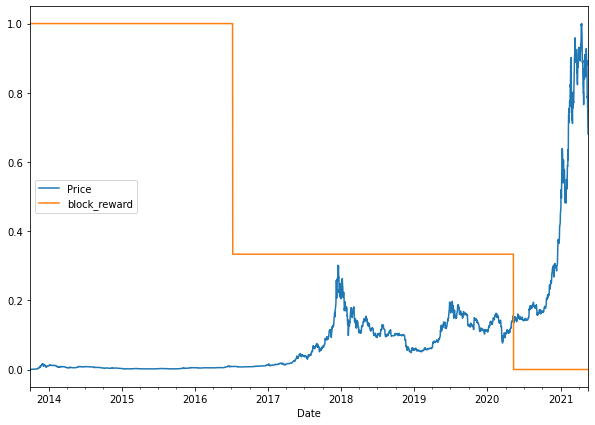

In [78]:
from sklearn.preprocessing import minmax_scale

bitcoin_scaled_df=pd.DataFrame(minmax_scale(bitcoin_df[["Price","block_reward"]]),
                                            columns=bitcoin_df.columns,
                                            index=bitcoin_df.index)

bitcoin_scaled_df.plot(figsize=(10,7));

#**Model_6**: Multivariate and same as model_1

In [79]:
bitcoin_windowed_df= bitcoin_df.copy()
for i in range(7):
  bitcoin_windowed_df[f"Price+{i+1}"]=bitcoin_df["Price"].shift(periods=i+1)

bitcoin_windowed_df.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [80]:
bitcoin_windowed_df.tail(2)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [81]:
x =bitcoin_windowed_df.dropna().drop("Price", axis=1).astype(np.float32)
x.head(2)

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002


In [82]:
y= bitcoin_windowed_df.dropna()["Price"].astype(np.float32)
y.head(2)

Date
2013-10-08    123.032997
2013-10-09    124.049004
Name: Price, dtype: float32

**Train test split**

In [83]:
train_len=int(0.8*len(bitcoin_windowed_df))
train_windows, train_horizons=x[:train_len], y[:train_len]
test_windows, test_horizons=x[train_len:], y[train_len:]

train_windows.shape, train_horizons.shape, test_windows.shape, test_horizons.shape

((2229, 8), (2229,), (551, 8), (551,))

In [84]:
model_6=tf.keras.Sequential([tf.keras.layers.Dense(128, activation="relu"),
                            tf.keras.layers.Dense(1)])

In [85]:
model_6.compile(loss= tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_6.fit(train_windows, train_horizons,
            epochs=100,
            validation_data=(test_windows, test_horizons),
            callbacks=[checkpoint_callback("model_6")],
            )

Epoch 1/100
70/70 [==============================] - 1s 10ms/step - loss: 707.8810 - mae: 707.8810 - val_loss: 1099.4785 - val_mae: 1099.4785
Epoch 2/100
70/70 [==============================] - 0s 3ms/step - loss: 175.6004 - mae: 175.6004 - val_loss: 1302.9169 - val_mae: 1302.9169
Epoch 3/100
70/70 [==============================] - 1s 9ms/step - loss: 159.9307 - mae: 159.9307 - val_loss: 817.4904 - val_mae: 817.4904
Epoch 4/100
70/70 [==============================] - 1s 9ms/step - loss: 145.3704 - mae: 145.3704 - val_loss: 782.3163 - val_mae: 782.3163
Epoch 5/100
70/70 [==============================] - 1s 9ms/step - loss: 138.3278 - mae: 138.3278 - val_loss: 734.2106 - val_mae: 734.2106
Epoch 6/100
70/70 [==============================] - 0s 3ms/step - loss: 137.8994 - mae: 137.8994 - val_loss: 1125.7262 - val_mae: 1125.7262
Epoch 7/100
70/70 [==============================] - 1s 9ms/step - loss: 141.1655 - mae: 141.1655 - val_loss: 725.4403 - val_mae: 725.4403
Epoch 8/100
70/70 [=

In [86]:
model_6.evaluate(test_windows, test_horizons)

18/18 [==============================] - 0s 2ms/step - loss: 567.1035 - mae: 567.1035


[567.1034545898438, 567.1034545898438]

In [87]:
y_preds=model_6.predict(test_windows)
y_preds.shape

18/18 [==============================] - 0s 1ms/step


(551, 1)

In [88]:
model_6_results=calculate_metrics(test_horizons.squeeze(), y_preds.squeeze())
model_6_results

{'mae': 567.10345,
 'mse': 1149782.1,
 'rmse': 1072.2789,
 'mape': 2.5301907,
 'mase': 0.9897939}

#**Model_7**:N-Beats ([NBeats paper](https://arxiv.org/pdf/1905.10437.pdf))

In [89]:
#create NBeats custom layer

class nbeats_block(tf.keras.layers.Layer):
  def __init__(self, input_size: int,
             theta_size: int, horizon: int,
             n_neurons: int, n_layers: int, **kwargs):
    super().__init__(**kwargs)
    self.input_size= input_size
    self.theta_size= theta_size
    self.horizon= horizon
    self.n_neurons= n_neurons
    self.n_layers= n_layers

    #block contains a stack of 4 fully connected layers with relu activation
    self.hidden=[tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    #output of the block is a theta layer with linear activation
    self.theta_layer=tf.keras.layers.Dense(theta_size, activation="linear")

  def call(self, inputs):
    x=inputs
    for layer in self.hidden:
      x=layer(x)
    theta=self.theta_layer(x)

    #output the backcast and forecast from theta
    backcast, forecast=theta[:,:self.input_size], theta[:,-self.horizon:]
    return backcast, forecast

In [90]:
WINDOW_SIZE, HORIZON

(7, 1)

In [91]:
nbeat_dummy_layer=nbeats_block(input_size=WINDOW_SIZE,
                               theta_size=WINDOW_SIZE+HORIZON,
                               horizon=HORIZON,
                               n_neurons=128,
                               n_layers=4)
backcast, forecast= nbeat_dummy_layer(np.expand_dims(np.arange(8)+1, axis=0))
print("backast:", backcast)
print("foecast:", forecast)

backast: tf.Tensor(
[[-1.4226921   0.7449331  -0.26345545 -0.9009878  -0.3464214  -0.5343606
  -0.26645654]], shape=(1, 7), dtype=float32)
foecast: tf.Tensor([[0.8632136]], shape=(1, 1), dtype=float32)


#**Speeding up data load**

In [92]:
bitcoin_shift_df=bitcoin_df.drop("block_reward", axis=1).copy()
for i in range(7):
  bitcoin_shift_df[f"Price+{i+1}"]=bitcoin_df["Price"].shift(periods=i+1)

bitcoin_shift_df.head(10)

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [93]:
full_windows=bitcoin_shift_df.dropna().drop("Price", axis=1)
full_horizons=bitcoin_shift_df.dropna()["Price"]

split_size=int(0.8*len(full_windows))
train_windows, train_horizons= full_windows[:split_size], full_horizons[:split_size]
test_windows, test_horizons= full_windows[split_size:], full_horizons[split_size:]

test_horizons.head()

Date
2019-11-10    8798.042055
2019-11-11    9081.186878
2019-11-12    8711.534339
2019-11-13    8760.892718
2019-11-14    8749.520591
Name: Price, dtype: float64

In [94]:
train_dataset=tf.data.Dataset.from_tensor_slices((train_windows, train_horizons)).batch(1024).prefetch(tf.data.AUTOTUNE)
test_dataset=tf.data.Dataset.from_tensor_slices((test_windows, test_horizons)).batch(1024).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

**Hyperparameters for model_7 *from the paper**

In [95]:
N_EPOCHS=5000
N_NEURONS=512
N_LAYERS=4
N_STACKS=30

INPUT_SIZE=WINDOW_SIZE*HORIZON
THETA_SIZE=WINDOW_SIZE+HORIZON

In [96]:
input_1=tf.range(10)+10
input_2=tf.range(10)

add=tf.keras.layers.add([input_1, input_2])
subtract=tf.keras.layers.subtract([input_1, input_2])

add, subtract

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>)

**Assembeling the n_beats model**

In [97]:
%%time

#1 initialising the nbeats block
nbeats_block_layer=nbeats_block(input_size=INPUT_SIZE,
                                theta_size=THETA_SIZE,
                                horizon=HORIZON,
                                n_neurons=N_NEURONS,
                                n_layers=N_LAYERS, name="initial_block")

#2 creating input layer
stack_input=tf.keras.layers.Input((WINDOW_SIZE,), name="input")

#3 top layer ie. initial forecast and backcast
backcast, forecast=nbeats_block_layer(stack_input)

#4 initial residual connection
residual= tf.keras.layers.subtract([stack_input, backcast], name="subtract_00")

#5 create the stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): #since the first one is already created
  block_backcast, block_forecast=nbeats_block(input_size=INPUT_SIZE,
                                theta_size=THETA_SIZE,
                                horizon=HORIZON,
                                n_neurons=N_NEURONS,
                                n_layers=N_LAYERS, name=f"block_{i}")(residual)

#6 double residual stacking
  residuals=tf.keras.layers.subtract([residual, block_backcast], name=f"subtract_{i}")
  forecast=tf.keras.layers.add([forecast, block_forecast], name=f"add_{i}")

#7 create model_7
model_7=tf.keras.Model(stack_input, forecast)

#8 compile
model_7.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#9 fit
history_7= model_7.fit(train_dataset,
                       validation_data=(test_dataset),
                       epochs=N_EPOCHS,
                       verbose=0,
                       callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                                  tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])




Epoch 317: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 417: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 1min 8s, sys: 2.17 s, total: 1min 11s
Wall time: 1min 22s


In [98]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 21ms/step - loss: 571.7449 - mae: 571.7449


[571.7449340820312, 571.7449340820312]

In [99]:
y_preds=model_7.predict(test_dataset)
y_preds.shape

1/1 [==============================] - 1s 1s/step


(556, 1)

In [100]:
model_7_results=calculate_metrics(test_horizons.squeeze(), y_preds.squeeze())
model_7_results

{'mae': 571.74493,
 'mse': 1146671.0,
 'rmse': 1070.8273,
 'mape': 2.6138701,
 'mase': 1.0043975}

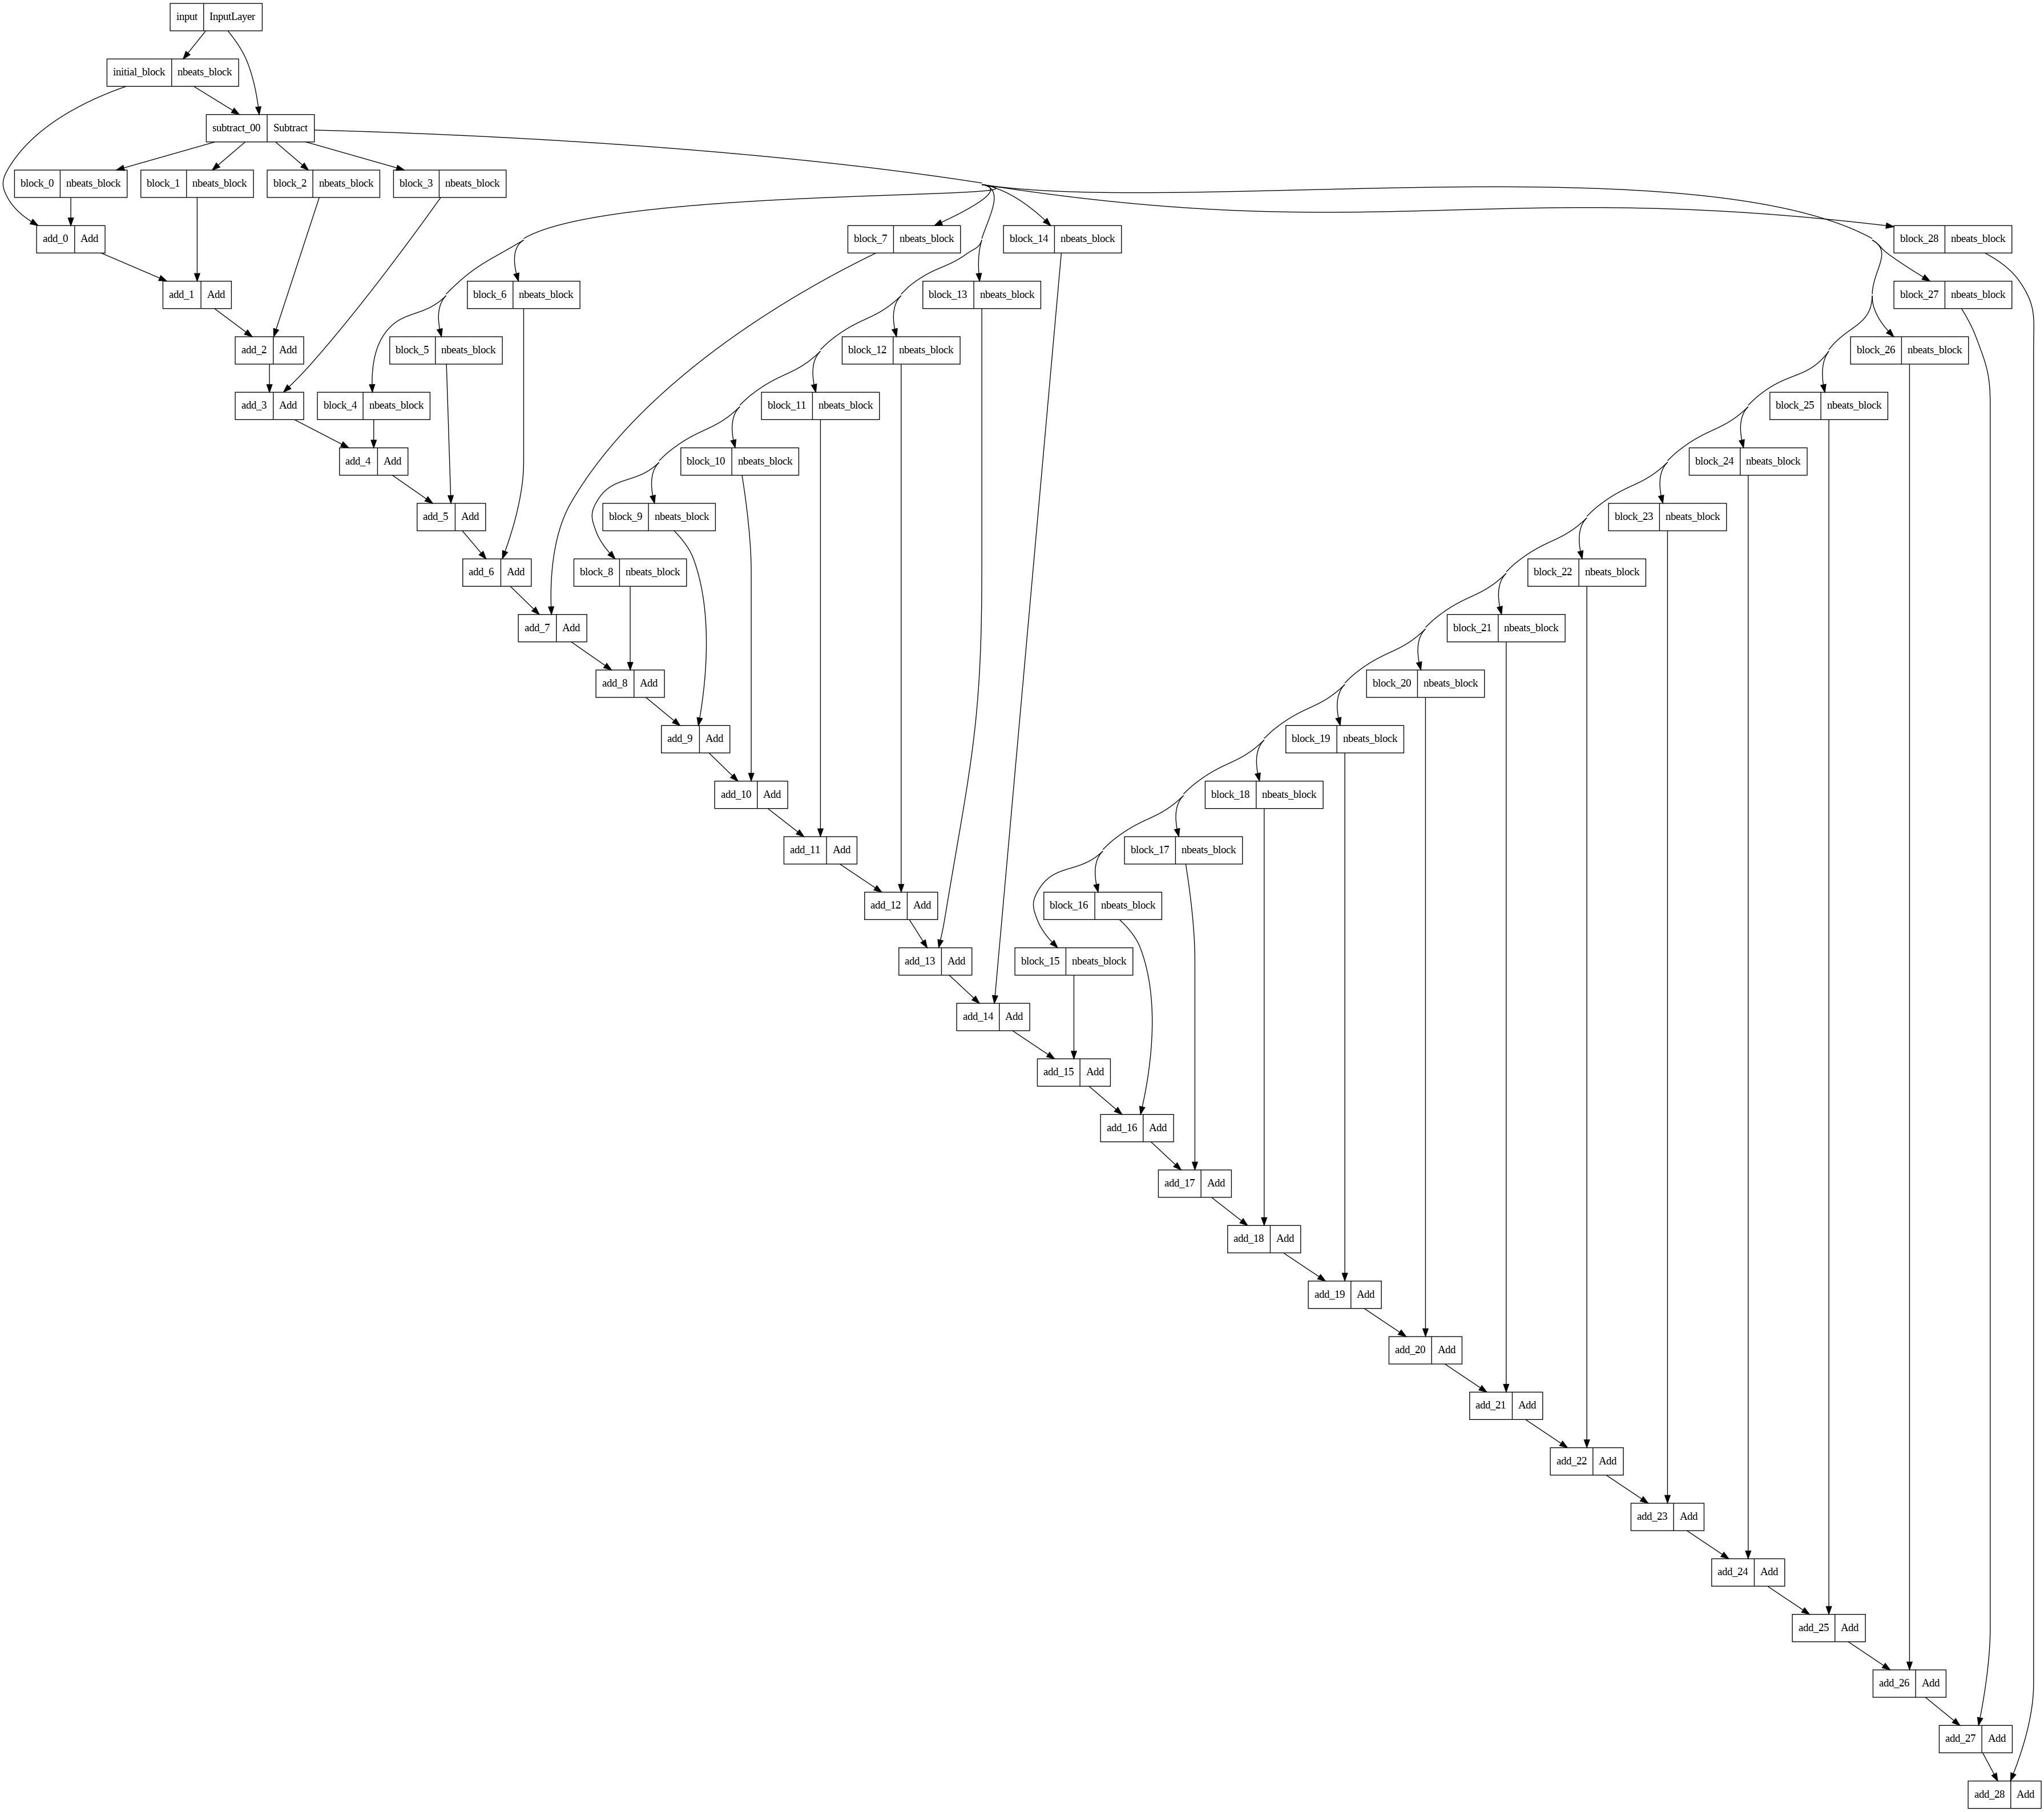

In [101]:
tf.keras.utils.plot_model(model_7)

#**Model_8**:ensemble

In [102]:
def ensemble_model(horizon=HORIZON, train_data=train_dataset, test_data=test_dataset,
                   num_iter=10, epochs=1000, loss_fns=["mae", "mse", "mape"]):
  
  ensemble_models=[]
  for i in range(num_iter):
    model=tf.keras.Sequential([tf.keras.layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                               tf.keras.layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                               tf.keras.layers.Dense(HORIZON)])
    for loss in loss_fns:

      print(f"optimizing model by reducing: {loss} for model: {i}")
      model.compile(loss=loss,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])
      model.fit(train_dataset,
                epochs=epochs,
                validation_data=(test_dataset),
                verbose=0,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])
      
      ensemble_models.append(model)

  return(ensemble_models)

In [103]:
%%time
ensemble_models=ensemble_model(num_iter=3, epochs=1000)

optimizing model by reducing: mae for model: 0

Epoch 394: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 494: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing model by reducing: mse for model: 0

Epoch 331: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 431: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing model by reducing: mape for model: 0

Epoch 116: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 216: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing model by reducing: mae for model: 1

Epoch 929: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
optimizing model by reducing: mse for model: 1

Epoch 169: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 269: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing model by reducing: mape for model

In [104]:
ensemble_preds=[]
for i in ensemble_models:
  y_preds=i.predict(test_dataset)
  ensemble_preds.append(y_preds)

ensemble_preds=tf.constant(tf.squeeze(ensemble_preds))

1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 4ms/step


In [105]:
ensemble_preds.shape

TensorShape([9, 556])

In [106]:
np.median(ensemble_preds, axis=0).shape

(556,)

In [107]:
ensemble_results_median=calculate_metrics(test_horizons.squeeze(), np.median(ensemble_preds, axis=0))
ensemble_results_median

{'mae': 567.73425,
 'mse': 1164326.6,
 'rmse': 1079.0397,
 'mape': 2.5441225,
 'mase': 0.9973518}

In [108]:
tf.reduce_mean(ensemble_preds, axis=0).shape

TensorShape([556])

In [109]:
ensemble_results_mean=calculate_metrics(test_horizons.squeeze(), tf.reduce_mean(ensemble_preds, axis=0))
ensemble_results_mean

{'mae': 567.92615,
 'mse': 1158008.6,
 'rmse': 1076.1082,
 'mape': 2.5438945,
 'mase': 0.99768895}

In [110]:
ensemble_preds.shape

TensorShape([9, 556])

In [111]:
std= tf.math.reduce_std(ensemble_preds, axis=0)
interval=1.96*std
mean= tf.reduce_mean(ensemble_preds, axis=0)

upper, lower= mean+interval, mean-interval

upper[:5], lower[:5]

(<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8817.877, 8818.766, 9107.748, 8762.071, 8796.629], dtype=float32)>,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=array([8793.168, 8806.51 , 9068.084, 8661.079, 8730.352], dtype=float32)>)

In [112]:
test_horizons.head()

Date
2019-11-10    8798.042055
2019-11-11    9081.186878
2019-11-12    8711.534339
2019-11-13    8760.892718
2019-11-14    8749.520591
Name: Price, dtype: float64

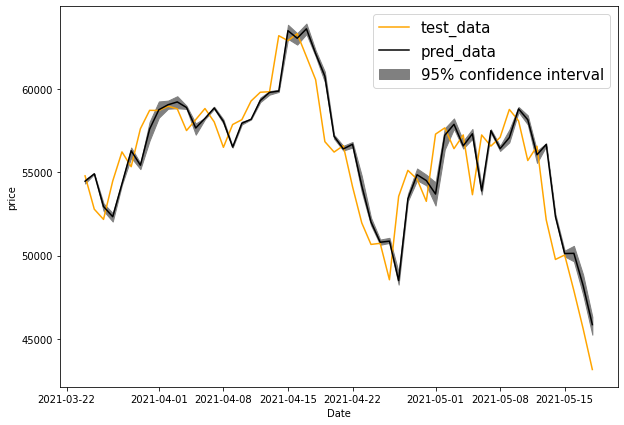

In [113]:
ensemble_median=np.median(ensemble_preds, axis=0)
offset=500

plt.figure(figsize=(10,7))
plt.plot(test_horizons.index[offset:], test_horizons[offset:], color="orange", label="test_data")
plt.plot(test_horizons.index[offset:], ensemble_median[offset:], "black", label="pred_data")
plt.fill_between(test_horizons.index[offset:], upper[offset:], lower[offset:], label="95% confidence interval", color="gray")
plt.xlabel("Date")
plt.ylabel("price")
plt.legend( fontsize=15);

#**Model_9**: model using full data(including pseudo future)

In [114]:
train_dataset=tf.data.Dataset.from_tensor_slices((full_windows, full_horizons)).batch(1024).prefetch(tf.data.AUTOTUNE)
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [115]:
model_9=tf.keras.Sequential([tf.keras.layers.Dense(128, activation="relu"),
                             tf.keras.layers.Dense(128, activation="relu"),
                             tf.keras.layers.Dense(HORIZON)])

model_9.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_9.fit(train_dataset,
            epochs=500,
            verbose=0)

>**Predicting into the future**

In [116]:
INTO_THE_FUTURE=14
WINDOW_SIZE=7

>**Important**: here the model is not trained repetedly after the addition of the new predicted value, however for more precise and right prediction the model ,ust be trained repetedly after the addition of the new data(ie. predicted value)

In [117]:
def predict_into_future(values, model, into_the_future=INTO_THE_FUTURE, window_size=WINDOW_SIZE):
  last_window=values[-window_size:]
  future_price=[]
  for i in range(into_the_future):
    y_pred=model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Last_window: {last_window}\nPredicted_value: {y_pred.squeeze()}")
    future_price.append(tf.squeeze(y_pred).numpy())

    #update the window_size
    last_window=np.append(last_window, y_pred.squeeze())[-window_size:]
  
  return future_price

In [118]:
full_windows=full_windows.to_numpy()
full_windows[:2]

array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
        123.65499],
       [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
        125.455  ]])

In [119]:
full_windows=full_windows.flatten()

In [120]:
forecast=predict_into_future(full_windows, model_9)

1/1 [==============================] - 0s 51ms/step
Last_window: [45604.61575361 47885.62525472 50032.69313676 49764.1320816
 52147.82118698 56573.5554719  55715.54665129]
Predicted_value: 45331.484375
1/1 [==============================] - 0s 14ms/step
Last_window: [47885.62525472 50032.69313676 49764.1320816  52147.82118698
 56573.5554719  55715.54665129 45331.484375  ]
Predicted_value: 48185.5703125
1/1 [==============================] - 0s 13ms/step
Last_window: [50032.69313676 49764.1320816  52147.82118698 56573.5554719
 55715.54665129 45331.484375   48185.5703125 ]
Predicted_value: 50612.34375
1/1 [==============================] - 0s 15ms/step
Last_window: [49764.1320816  52147.82118698 56573.5554719  55715.54665129
 45331.484375   48185.5703125  50612.34375   ]
Predicted_value: 50009.5234375
1/1 [==============================] - 0s 15ms/step
Last_window: [52147.82118698 56573.5554719  55715.54665129 45331.484375
 48185.5703125  50612.34375    50009.5234375 ]
Predicted_value: 5

In [121]:
forecast

[45331.484,
 48185.57,
 50612.344,
 50009.523,
 53189.258,
 56538.08,
 54048.76,
 45255.21,
 48473.094,
 51024.867,
 50579.004,
 54065.062,
 56125.945,
 52428.137]

In [122]:
def future_dates(start, into_future, offset=1):
  start=start+np.timedelta64(offset,"D")
  end=start+np.timedelta64(into_future, "D")
  return np.arange(start, end, dtype="datetime64[D]")

In [123]:
future_dates=future_dates(full_horizons.index[-1], 14)
future_dates

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [124]:
future_dates=np.insert(future_dates, 0, full_horizons.index[-1])
forecast=np.insert(forecast, 0, bitcoin_shift_df.dropna().Price[-1])

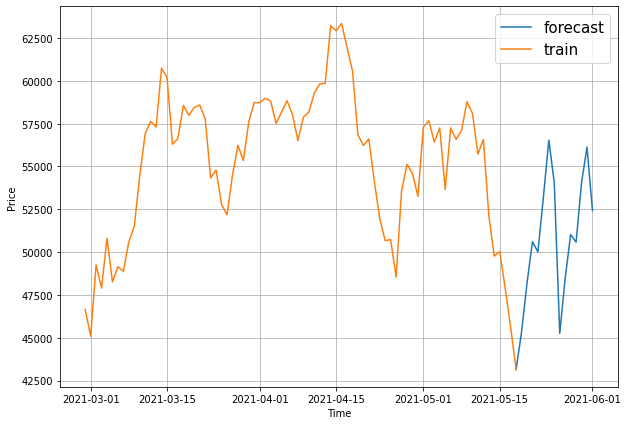

In [125]:
plt.figure(figsize=(10,7))
plot_series(future_dates, forecast, format="-", label="forecast")
plot_series(full_horizons.index, bitcoin_shift_df.dropna().Price, format="-", label="train", start=2700)

#**Model_10**: the turkey problrm(or black swan problem)

In [126]:
bitcoin_df=bitcoin_df.drop(["block_reward"], axis=1)

In [127]:
bitcoin_df.Price[-1]=bitcoin_df.Price[-1]/100 #the price of only the last date is change highly unlikely but possible

In [128]:
prices_full=np.array(bitcoin_df.Price)
prices_full[:5]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866])

In [129]:
time_steps_full=np.array(bitcoin_df.index)
time_steps_full[:5]

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
       '2013-10-05T00:00:00.000000000'], dtype='datetime64[ns]')

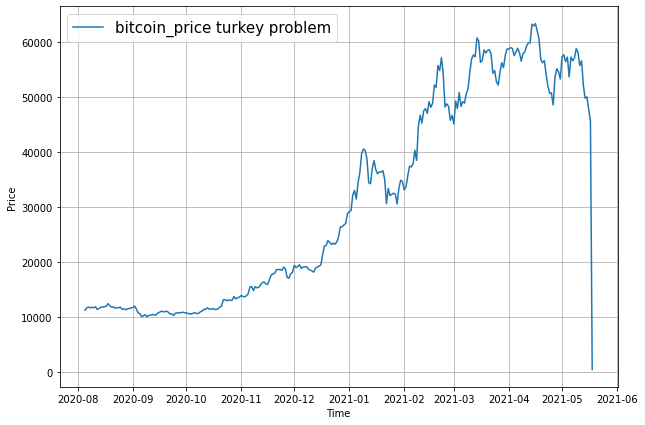

In [130]:
plt.figure(figsize=(10,7))
plot_series(time_steps_full, prices_full, format="-", start=2500, label="bitcoin_price turkey problem")

In [131]:
WINDOW_SIZE=7
HORIZON=1

In [132]:
full_windows, full_horizons=make_windows(prices_full, horizon=HORIZON, window=WINDOW_SIZE)
x_train, x_test, y_train, y_test= train_test_split(full_windows, full_horizons)

In [133]:
model_10=tf.keras.models.clone_model(model_1)

In [134]:
model_10.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

history_10=model_10.fit(x_train, y_train,
                      epochs=100,       
                      callbacks=[checkpoint_callback("model_10")],
                      validation_data=(x_test, y_test),
                      batch_size=128) #since the data points are themselves very small

Epoch 1/100
18/18 [==============================] - 1s 30ms/step - loss: 1211.7067 - mae: 1211.7067 - val_loss: 2332.9299 - val_mae: 2332.9299
Epoch 2/100
18/18 [==============================] - 0s 28ms/step - loss: 279.0042 - mae: 279.0042 - val_loss: 1202.4584 - val_mae: 1202.4584
Epoch 3/100
18/18 [==============================] - 1s 45ms/step - loss: 167.5663 - mae: 167.5663 - val_loss: 1025.2797 - val_mae: 1025.2797
Epoch 4/100
18/18 [==============================] - 0s 27ms/step - loss: 153.5230 - mae: 153.5230 - val_loss: 910.8272 - val_mae: 910.8272
Epoch 5/100
18/18 [==============================] - 0s 26ms/step - loss: 148.5427 - mae: 148.5427 - val_loss: 891.5153 - val_mae: 891.5153
Epoch 6/100
18/18 [==============================] - 0s 26ms/step - loss: 141.1381 - mae: 141.1381 - val_loss: 832.7703 - val_mae: 832.7703
Epoch 7/100
18/18 [==============================] - 0s 27ms/step - loss: 135.6398 - mae: 135.6398 - val_loss: 819.4512 - val_mae: 819.4512
Epoch 8/100


In [135]:
model_10=tf.keras.models.load_model("/content/model_experiments/model_10")

In [136]:
model_10.evaluate(x_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 645.3953 - mae: 645.3953


[645.395263671875, 645.395263671875]

In [137]:
y_preds=model_10.predict(x_test)
y_preds[:3]

18/18 [==============================] - 0s 1ms/step


array([[8871.363],
       [8801.592],
       [9065.565]], dtype=float32)

In [138]:
model_10_results=calculate_metrics(y_test, y_preds.squeeze())
model_10_results

{'mae': 17143.979,
 'mse': 615510100.0,
 'rmse': 23744.018,
 'mape': 121.578156,
 'mase': 26.530361}

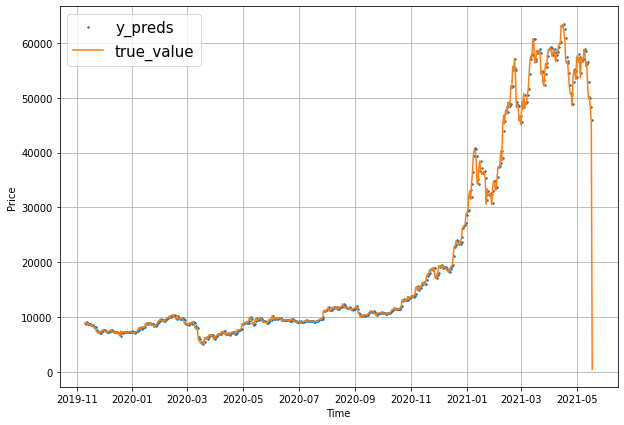

In [139]:
plt.figure(figsize=(10,7))
plot_series(time_steps_full[-len(y_test):], y_preds, label="y_preds")
plot_series(time_steps_full[-len(y_test):], y_test, label="true_value", format="-")
#the predicted value is no where near the true value, this is why the error matrix shot up

#**Conclusions**

In [140]:
model_results_df=pd.DataFrame({"model_0_naive":model_0_results,
                               "model_1_dense_w7_h1":model_1_results,
                               "model_2_dense_w30_h1":model_2_results,
                               "model_3_dense_w30_h7":model_3_results,
                               "model_4_conv_1d":model_4_results,
                               "model_5_LSTM":model_5_results,
                               "model_6_multivariate":model_6_results,
                               "model_7_nbeats":model_7_results,
                               "model_8_ensemble":ensemble_results_median,
                               "model_10_turkey":model_10_results}).T

In [141]:
model_results_df

,mae,mse,rmse,mape,mase
model_0_naive,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,565.506958,1.159045e+06,1076.589478,2.529204,0.993439
model_2_dense_w30_h1,587.236023,1.216679e+06,1103.031738,2.642932,1.026494
model_3_dense_w30_h7,1210.512207,5.096469e+06,1389.687866,5.536816,2.154039
model_4_conv_1d,570.470825,1.178377e+06,1085.530884,2.541320,1.002159
model_5_LSTM,584.026306,1.229932e+06,1109.023071,2.621700,1.025972
model_6_multivariate,567.103455,1.149782e+06,1072.278931,2.530191,0.989794
model_7_nbeats,571.744934,1.146671e+06,1070.827271,2.613870,1.004398
model_8_ensemble,567.734253,1.164327e+06,1079.039673,2.544122,0.997352
model_10_turkey,17143.978516,6.155101e+08,23744.017578,121.578156,26.530361
